<b> Set up modules (standard and mine) </b>

In [131]:
### Import Standard Packages ###
import matplotlib.pyplot as mp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import numpy as np
import metpy.calc as mpc
import metpy.constants as mconst
import xarray as xr
import scipy as spy
import pandas as pd
import datetime as dt

#dir(mconst)
### My Functions ###
import scam_func as mypy
import importlib

<b> Add Experiment Set </b>

In [132]:
#### SCRIPT TO READ IN SCAM OUTPUT AND MAKE SOME PLOTS ####
###### IOP file info. ######

#xr.show_versions()


## Multiple cases ##

#scam_file_nums = ['011a','011b','011c','011d']  # For comparisons
#scam_file_nums = ['012a','012b','012c','012d','012e','012f']  # For comparisons
#scam_file_nums = ['012a','012b','012f']
#scam_run_names = ['q_ft','0.5LS.T','no LS.Tq']

#scam_run_names = ['q_ft','0.5LS.T','0.5LS.q','0.5LS.Tq','0.25LS.Tq','no LS.Tq']

## Vertical resolution ##
#scam_file_nums = ['100a','100','100b','100c']
#scam_file_nums = ['101a','101','101b','101c','101d'] # 'a'=L16, ''=L32
#scam_run_names = ['L16','L32','L64','L128','L256']

#scam_file_nums = ['102a','102','102b','102c'] # 'a'=L15, ''=L30
#scam_run_names = ['L15','L30','L60','L120']


#scam_file_nums = ['101','102'] # 'a'=L16, ''=L32
#scam_run_names = ['CAM6','CAM5']


#scam_file_nums = ['101def','102def'] # 'a'=L16, ''=L32
#scam_run_names = ['CAM6 default','CAM5 default']

#scam_file_nums = ['101','101def'] # 'a'=L16, ''=L32
#scam_run_names = ['CAM6 2 min','CAM6']

#scam_file_nums = ['102','102def'] # 'a'=L16, ''=L32
#scam_run_names = ['CAM5 2 min','CAM5']

#scam_file_nums = ['101','102'] # 'a'=L16, ''=L32
#scam_run_names = ['CAM6 2 min','CAM5 2 min']

#scam_file_nums = ['101d','101dx'] # 'a'=L16, ''=L32
#scam_run_names = ['CAM6 until 4pm','CAM6 until 11:30pm']

#scam_file_nums = ['101d','201d','202d'] # 'a'=L16, ''=L32
#scam_run_names = ['gamma_coef=0.308','gamma_coef=0.285','gamma_coef=0.345']

### WITH LES ###

#scam_file_nums = np.array(['101d','203d','204d','LES']) # 'a'=L16, ''=L32
#scam_run_names = ['clubb_c_k10=0.5','clubb_c_k10=0.3','clubb_c_k10','LES']

#scam_file_nums = ['101a','101','101b','101c','101d']# 'a'=L16, ''=L32
#scam_run_names = ['L16','L32','L64','L128','L256']

scam_file_nums = np.array(['105d','LES']) # ''=L16, ''=L32
scam_run_names = ['CAM6','NCAR LES']

scam_file_pre = "history/FSCAM.T42_T42.SAS."
scam_file_suf = ".cam.h0.2013-06-10-39600.nc"
#scam_file_suf = ".cam.h0.2013-06-10-39600.nc"

les_file_in = "LES/patton_sas_stats.nc"


<b> Diagnostic Field Selections </b>

In [136]:
#### PLOTTING ####

### 1D TS ### 

#pvars_ts1d = np.array(['PBLH','TS','LHFLX','SHFLX','PRECC','PRECL','FLNS']) # D profile timeseries plots
#pvars_ts2d = ['DTV','VD01','DCQ','Q','T','TH','THL']
pvars_ts1d = np.array(['PBLH','LHFLX','SHFLX'])



### 2D TS ###
                       ## WPSKEW is WP3_CLUBB/WP2_CLUBB**3/2
#pvars_ts2d = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT', 
#            'STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','WP3_CLUBB','THLP2_CLUBB','WP2_CLUBB'] # 2D profile timeseries plots
#pvars_ts2d = ['WPRTP_CLUBB','Q','TH']
#pvars_ts2d = ['DTV','VD01','DCQ','Q','T','TH','THL']
pvars_ts2d = ['TH','Q','WP2_CLUBB','WP3_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB']




### 1D SNAPSHOT ###

#pvars_ts2d = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT','DTCOND','DCQ']

#pvars_ts2d = ['STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB'] 
    
#pvars_snap = ['STEND_CLUBB','RVMTEND_CLUBB','TH','THL','Q','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB']  # Snapshot plotting vars
#pvars_snap = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT','DTCOND','DCQ']
pvars_snap = ['TH','THL','Q','RELHUM','DTV','DCQ','STEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB']

pvars_anim = np.array(('Q'))

tsnaps = np.array([6.,8.,10.,12.,14.,16])     # Time of snapshots (local time)


### Bundle these array for pasing to functions ###
run_info = {}
run_info['1dvars'] = pvars_ts1d
run_info['2dvars'] = pvars_ts2d
run_info['snapvars'] = pvars_snap

####### GRAPHICS ########
#mp.interactive(True)
#%matplotlib qt
#%matplotlib inline

<b> Files Setups </b>

In [137]:
#### CONSTANTS #####

r_gas = mconst.dry_air_gas_constant.magnitude   # Specific gas constant for dry air
cp_air = mconst.dry_air_spec_heat_press.magnitude # Specific heat for dry air
Lv = mconst.water_heat_vaporization.magnitude       # Latent heat of vaporization

r_cp = r_gas/cp_air    # r/cp
grav = mconst.earth_gravity.magnitude       # Gravity ave.
p0 = mconst.pot_temp_ref_press.magnitude


####### DERIVED VARS #######

scam_files_in = [scam_file_pre+x+scam_file_suf for x in scam_file_nums]

print('++++ Runs ++++')
print('')
#scam_files_in = scam_file_pre+scam_file_nums+scam_file_suf 
scam_fig_stub='png/'+'_'.join(scam_file_nums)

scam_files_in = np.where(scam_file_nums == "LES",les_file_in,scam_files_in) # Change to LES file if needed

zoffset = 6.  # Offset for Z time.
### Bundle run info ###

run_info['Run Name']   = scam_run_names
run_info['File Num']   = scam_file_nums
run_info['File Name']  = scam_files_in
run_info['zoffset']    = zoffset
run_info['Stub Figs']  = scam_fig_stub

#df_rinfo = pd.DataFrame(rinfo)
#df_rinfo.style.set_properties(**{'background-color': 'white','color': 'yellow'})
#df_rinfo.style.apply({'background-color': 'white'})

##### Point Files #######

## Dimensions ##

scam_in = xr.open_dataset(scam_files_in[0])

ntsnaps = tsnaps.size
ncases = len(scam_file_nums)


++++ Runs ++++



<b> Plot type selection </b>

+++ IMPORTING MY FUNCTIONS +++
+++ ANIMATION +++
                                  long_name   units      vscale   ymin  \
LHFLX                      Latent Heat Flux    W/m2         1.0    0.0   
SHFLX                    Sensible Heat Flux    W/m2         1.0    0.0   
TS                      Surface Temperature       K         1.0  290.0   
PBLH                   Boundary Layer Depth  meters         1.0    0.0   
PBLH_DTHL    Boundary Layer Depth (dthl/dz)  meters         1.0    0.0   
PRECL             Large-Scale Precipitation  mm/day  86400000.0    0.0   
PRECC              Convective Precipitation  mm/day  86400000.0    0.0   
FLNS       Surface Net Short-wave Radiation    W/m2         1.0  200.0   
CAPE                                   CAPE    J/kg         1.0    0.0   

             ymax var_les     lscale  
LHFLX       400.0   wqsfc  2501000.0  
SHFLX       300.0   wtsfc     1005.0  
TS          310.0                1.0  
PBLH       3000.0    zi_t        1.0  
PBLH_DTHL  3000

/Users/rneale/Documents/NCAR/python/python-scripts/PBL/scam_func.py:578: UserWarning: The following kwargs were not used by contour: 'linestyle'
  #				print(zlev)


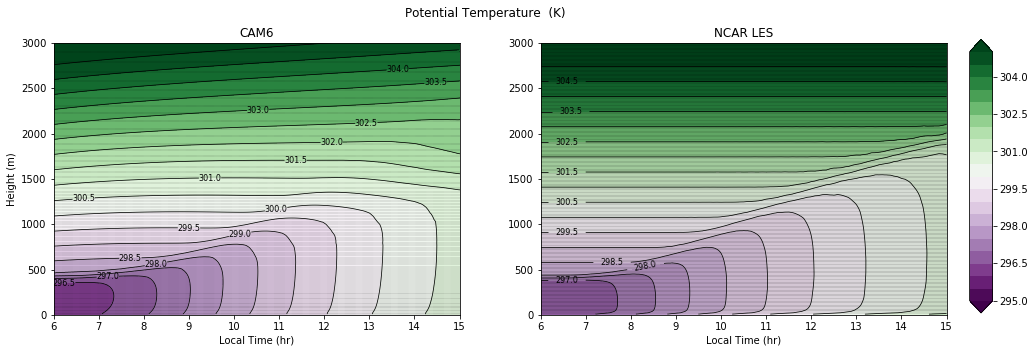

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
 -  Q  -  Specific humidity  -- cmin/cmax -->  1.0 12.0
Case =  105d Range= 5.1746676e-11 0.011799983


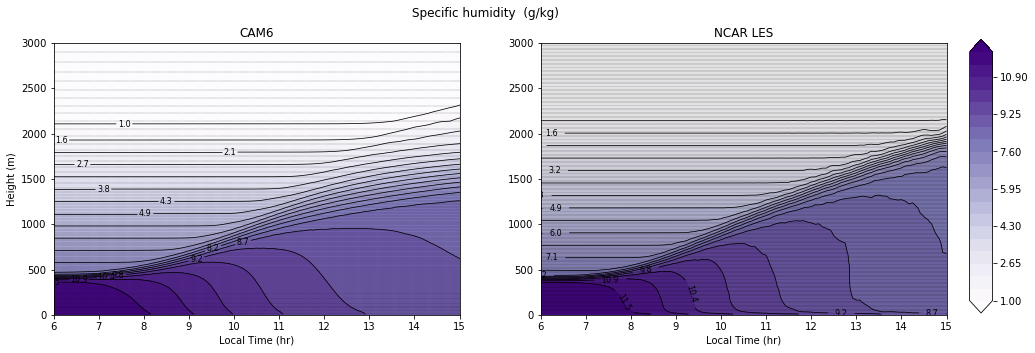

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
 -  WP2_CLUBB  -  Vertical Velocity Variance  -- cmin/cmax -->  0.0 2.0
Case =  105d Range= 0.0004 0.95064276


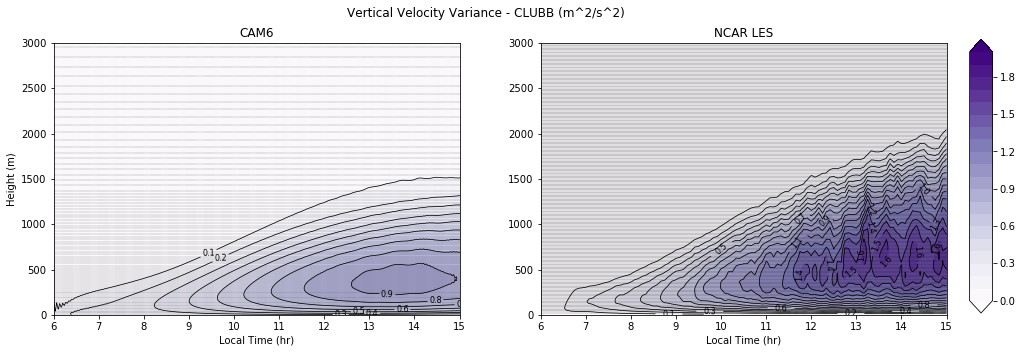

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
 -  WP3_CLUBB  -  Third Moment Vertical Velocity  -- cmin/cmax -->  0.0 0.5
Case =  105d Range= -0.036537867 0.1655862


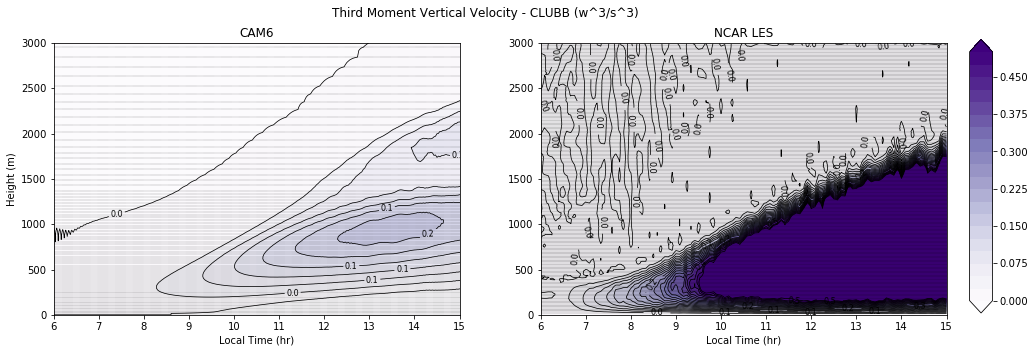

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
 -  WPTHLP_CLUBB  -  Heat Flux  -- cmin/cmax -->  -100.0 100.0
Case =  105d Range= -23.21058 101.12681


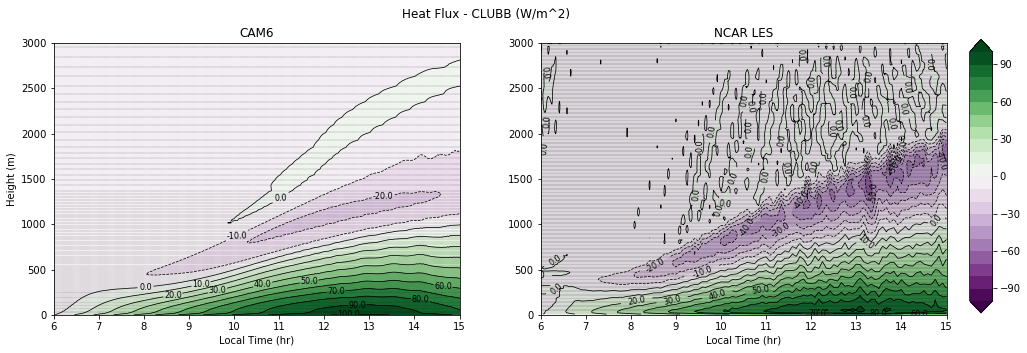

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
 -  WPRTP_CLUBB  -  Moisture Flux  -- cmin/cmax -->  -0.0 600.0
Case =  105d Range= -0.0009540207 443.1064


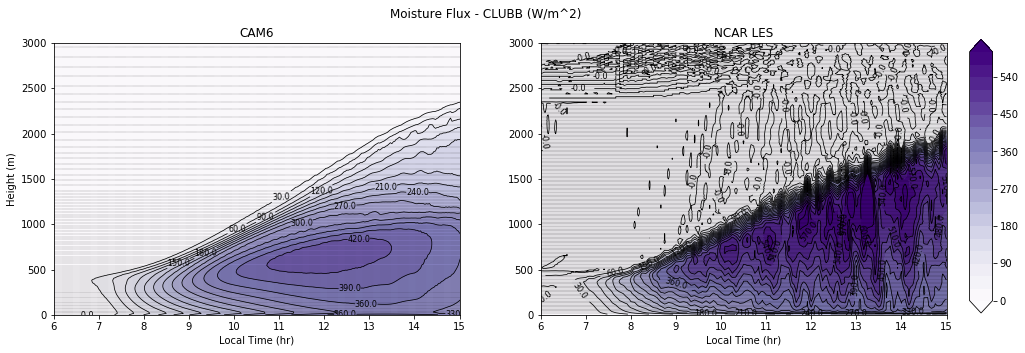

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
 -  THLP2_CLUBB  -  Temperature Variance  -- cmin/cmax -->  0.0 0.05
Case =  105d Range= 1e-04 0.06234446


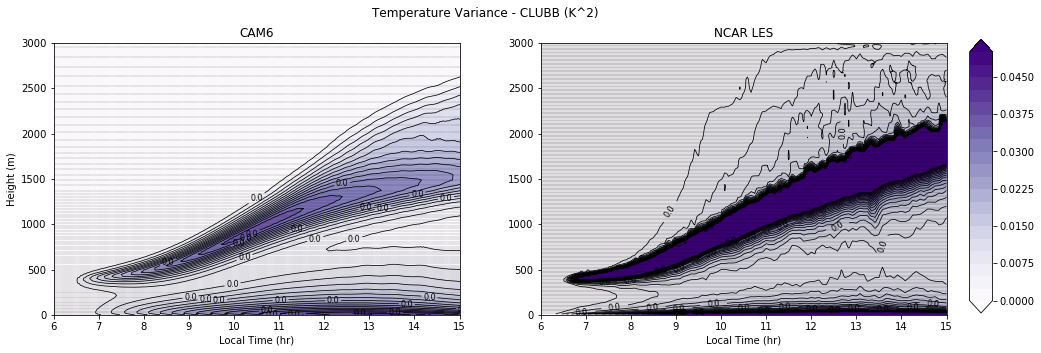

In [138]:
###### Plotting ##########
importlib.reload(mypy) # Required because I ma constantly editing scam_func.py
#dir(mypy)

mypy.plot1d_ts_scam(run_info)   # 1D time series plots
mypy.plot2d_ts_scam(run_info)   # 2D time series plots
#mypy.plot1d_snap_scam(run_info)   # 1D snapshot plots
#mypy.plot1d_anim_scam(run_info) # 2D animation  plots
